In [1]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
from netrd.reconstruction import MarchenkoPastur
%matplotlib inline

In [2]:
print('Generate a synthetic dataset')
N = 250
T = 300
M = np.random.normal(size=(N,T))

Generate a synthetic dataset


In [3]:
print('Create correlated time series')
market_mode = 0.4*np.random.normal(size=(1,T))
M += market_mode

sector_modes = {d: 0.5*np.random.normal(size=(1,T)) for d in range(5)}
for sector_mode, vals in sector_modes.items():
    M[sector_mode*50:(sector_mode+1)*50,:] += vals

Create correlated time series


In [4]:
print('Network reconstruction step')
mp_net = MarchenkoPastur()
G = mp_net.fit(M, only_positive=True) # removing only noisy correlations
G_no_market = mp_net.fit(M, only_positive=True, remove_largest=True) # removing also market mode effects

Network reconstruction step


In [5]:
print('Observed noisy correlation')
C = np.corrcoef(M)
C[C<0] = 0 # remove negative values
np.fill_diagonal(C,0) # remove self-loops
G_noisy = nx.from_numpy_array(C) # create graph

Observed noisy correlation


Observed noisy correlation graph


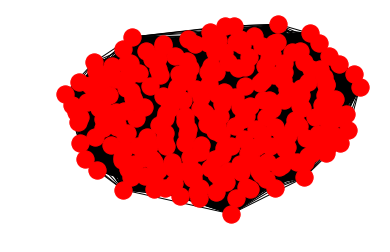

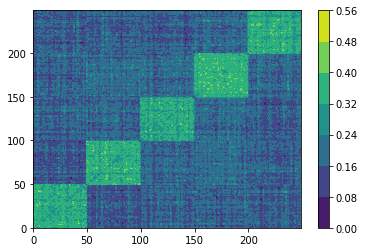

In [6]:
print('Observed noisy correlation graph')
fig, ax = plt.subplots()
nx.draw(G_noisy, ax=ax)

fig, ax = plt.subplots()
cax = ax.contourf(C)
fig.colorbar(cax)

Reconstructed correlation graph


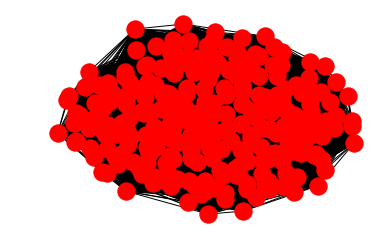

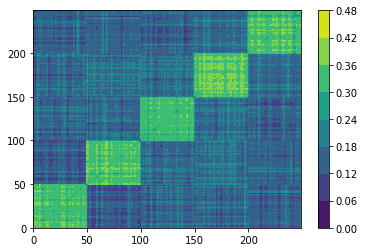

In [7]:
print('Reconstructed correlation graph')
fig, ax = plt.subplots()
nx.draw(G, ax=ax)

fig, ax = plt.subplots()
C_mp = nx.adjacency_matrix(G).todense()
cax = ax.contourf(C_mp)
fig.colorbar(cax)

Reconstructed correlation graph without market mode


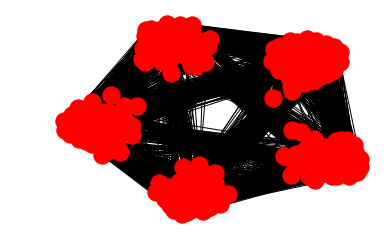

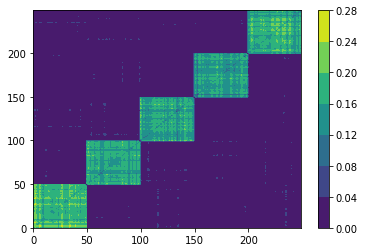

In [8]:
print('Reconstructed correlation graph without market mode')
fig, ax = plt.subplots()
nx.draw(G_no_market, ax=ax)

fig, ax = plt.subplots()
C_mp_no_market = nx.adjacency_matrix(G_no_market).todense()
cax = ax.contourf(C_mp_no_market)
fig.colorbar(cax)